<a href="https://colab.research.google.com/github/ZenonNoPro/abc/blob/main/testKmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8


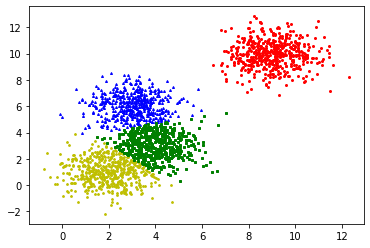

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(20)
numClusters = 4
numPoints = 500
cov = np.array([[1, 0],[0, 1]])
mean = [[2, 1], [4, 3], [3, 6], [9, 10]]

# build input
cltOne = np.random.multivariate_normal(mean[0], cov, numPoints)
cltTwo = np.random.multivariate_normal(mean[1], cov, numPoints)
cltThree = np.random.multivariate_normal(mean[2], cov, numPoints)
cltFour = np.random.multivariate_normal(mean[3], cov, numPoints)

X = np.concatenate((cltOne, cltTwo, cltThree, cltFour), axis = 0)
label = np.array([0] * numPoints + [1] * numPoints + [2] * numPoints + [3] * numPoints).T

def init():
  return X[np.random.choice(X.shape[0], numClusters, replace = 0)]

def assign_labels(X, center):
  dis = cdist(center, X)
  tmp = np.argmin(dis, axis = 0)
  return tmp

def find_centers(X, label):
  center = np.zeros((numClusters, X.shape[1]))
  for lb in range(numClusters):
    tmp = X[label == lb, :]
    center[lb, :] = np.mean(tmp, axis = 0)
  return center

def check(center, new_center):
  return (set(tuple(a) for a in center) == set(tuple(a) for a in new_center))

def show(X):
  X0 = X[label == 0, :]
  X1 = X[label == 1, :]
  X2 = X[label == 2, :]
  X3 = X[label == 3, :]
  plt.plot(X0[:, 0], X0[:, 1], 'ro', markersize = 2)
  plt.plot(X1[:, 0], X1[:, 1], 'yp', markersize = 2)
  plt.plot(X2[:, 0], X2[:, 1], 'b^', markersize = 2)
  plt.plot(X3[:, 0], X3[:, 1], 'gs', markersize = 2)

def solve(X, label):    
  center = init()
  cnt = 0
  while 1:
    label = assign_labels(X, center)
    new_center = find_centers(X, label)
    if check(center, new_center):
      print(cnt)
      break
    center = new_center
    cnt += 1
  return(X, label, center)
(X, label, center) = solve(X, label)
show(X)



